In [2]:
import warnings
warnings.filterwarnings('ignore')

import os

import sys
import random
import joblib
import json 

import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from types import SimpleNamespace
from collections import Counter

import torch


# Monocyte/Neutrophil only

In [195]:
std = torch.load("/data/gl/g2/sachit/data/klein/perturbations/std.pt")

In [196]:
std.keys()

dict_keys(['meta', 'xp_std', 'xu_std', 'pca_std', 'um_std', 'genes'])

In [197]:
um=std["um_std"]

In [198]:
ensemble = torch.load("/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_neu/Gilaldi_neutrophil_2_over.pt")

In [199]:
ensemble.keys()

dict_keys(['perturbed_genes', 'unperturbed_sim', 'unperturbed_tp', 'unperturbed_labs', 'perturbed_sim', 'perturbed_tp', 'perturbed_labs'])

In [200]:
xu_std = std["xu_std"]

In [201]:
unp=ensemble["unperturbed_tp"]

In [202]:
a=np.concatenate(unp[0][-1],axis=0)

In [203]:
temp=um.transform(a)

In [204]:
labs=pd.DataFrame({"celltype":ensemble["unperturbed_labs"][0][-1]})

In [205]:
labs["cellfactor"]=pd.factorize(labs.celltype)[0]

In [206]:
np.unique(labs["celltype"])

array(['Baso', 'Eos', 'Lymphoid', 'Meg', 'Monocyte', 'Neutrophil',
       'undiff'], dtype=object)

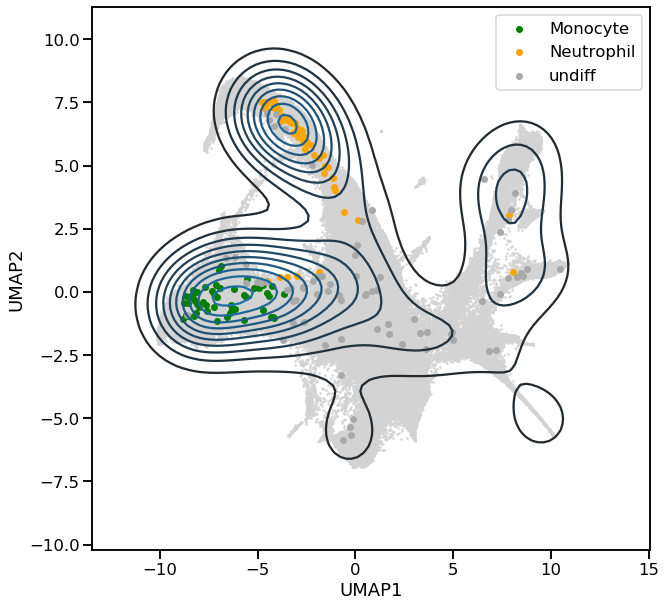

In [207]:
import matplotlib
sns.set_context("talk")
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(xu_std[:,0], xu_std[:,1], s=1, c="lightgray")
#cmap=["crimson", "dodgerblue", "pink", "purple", "green", "orange", "darkgrey"]
cmap=["green", "orange", "darkgrey"]
j=0
for lab in np.unique(labs["celltype"]):
    i=np.where(labs["celltype"]==lab)
    if lab in ["Baso", "Eos", "Lymphoid", "Meg"]:
        continue
    ax.scatter(temp[i,0], temp[i,1], s=30, color=cmap[j], label=lab)
    j+=1
#scatter=ax.scatter(temp[:,0], temp[:,1], s=50, cmap=matplotlib.colors.ListedColormap(cmap), c=labs["cellfactor"])
sns.kdeplot(temp[:,0], temp[:,1])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
ax.legend()
#plt.axis("off")
plt.show()

In [208]:
xu_std = std["xu_std"]

In [209]:
unp=ensemble["perturbed_tp"]

In [210]:
a=np.concatenate(unp[0][-1],axis=0)

In [211]:
temp=um.transform(a)

In [212]:
labs=pd.DataFrame({"celltype":ensemble["perturbed_labs"][0][-1]})

In [213]:
labs["cellfactor"]=pd.factorize(labs.celltype)[0]

In [214]:
np.unique(labs["celltype"])

array(['Baso', 'Eos', 'Meg', 'Monocyte', 'Neutrophil', 'undiff'],
      dtype=object)

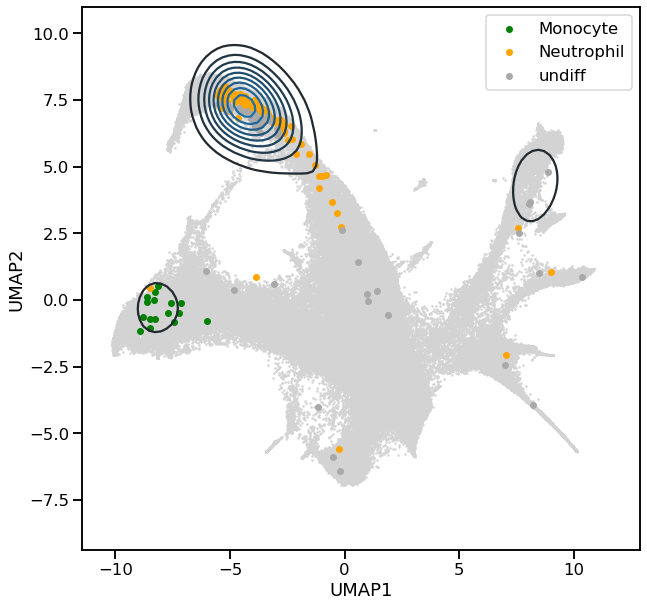

In [215]:
import matplotlib
sns.set_context("talk")
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(xu_std[:,0], xu_std[:,1], s=1, c="lightgray")
#cmap=["crimson", "dodgerblue", "pink", "purple", "green", "orange", "darkgrey"]
cmap=["green", "orange", "darkgrey"]
j=0
for lab in np.unique(labs["celltype"]):
    i=np.where(labs["celltype"]==lab)
    if lab in ["Baso", "Eos", "Lymphoid", "Meg"]:
        continue
    ax.scatter(temp[i,0], temp[i,1], s=30, color=cmap[j], label=lab)
    j+=1
#scatter=ax.scatter(temp[:,0], temp[:,1], s=50, cmap=matplotlib.colors.ListedColormap(cmap), c=labs["cellfactor"])
sns.kdeplot(temp[:,0], temp[:,1], c="k")
ax.legend()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
#plt.axis("off")
plt.show()

In [216]:
ensemble.keys()

dict_keys(['perturbed_genes', 'unperturbed_sim', 'unperturbed_tp', 'unperturbed_labs', 'perturbed_sim', 'perturbed_tp', 'perturbed_labs'])

In [217]:
yp=ensemble["unperturbed_labs"][0]

In [218]:
num_init=200

In [219]:
# make proportions table
prop_list=[]
for elt in yp:
    prop_dict = {"undiff":0.0, "Neutrophil":0.0, "Meg":0.0, "Monocyte": 0.0, "Baso": 0.0, "Mast": 0.0, "Lymphoid":0.0, "Erythroid":0.0, "Eos": 0.0, "Ccr7_DC": 0.0, "pDC": 0.0}
    for thing in elt:
        prop_dict[thing]=Counter(elt)[thing]/num_init
    prop_list.append(prop_dict)

In [220]:
prop_table=pd.DataFrame(prop_list)*100

In [221]:
other_sum = prop_table["Meg"]+prop_table["Baso"]+prop_table["Mast"]+prop_table["Lymphoid"]+prop_table["Erythroid"]+prop_table["Eos"]+prop_table["Ccr7_DC"]+prop_table["pDC"]

In [222]:
prop_table=pd.DataFrame([prop_table["undiff"],prop_table["Neutrophil"],prop_table["Monocyte"], other_sum]).T

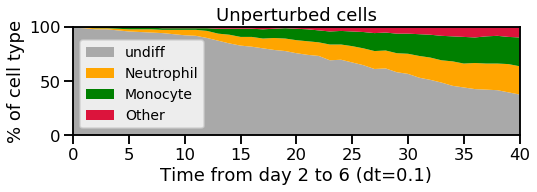

In [223]:
plt.figure(figsize=(8,2))
sns.set_context("talk")
labels=["undiff", "Neutrophil", "Monocyte", "Other"]
colors=["darkgrey", "orange", "green", "crimson"]
plt.stackplot(np.arange(40+1),  prop_table["undiff"], 
              prop_table["Neutrophil"],  prop_table["Monocyte"], 
              prop_table["Unnamed 0"], labels=labels, colors=colors)
plt.legend(loc='lower left', prop={'size': 14})
plt.margins(0,0)
plt.title('Unperturbed cells')
plt.xlabel("Time from day 2 to 6 (dt=0.1)")
plt.ylabel("% of cell type")
plt.show()

In [224]:
yp=ensemble["perturbed_labs"][0]

In [225]:
num_init=200

In [226]:
# make proportions table
prop_list=[]
for elt in yp:
    prop_dict = {"undiff":0.0, "Neutrophil":0.0, "Meg":0.0, "Monocyte": 0.0, "Baso": 0.0, "Mast": 0.0, "Lymphoid":0.0, "Erythroid":0.0, "Eos": 0.0, "Ccr7_DC": 0.0, "pDC": 0.0}
    for thing in elt:
        prop_dict[thing]=Counter(elt)[thing]/num_init
    prop_list.append(prop_dict)

In [227]:
prop_table=pd.DataFrame(prop_list)*100

In [228]:
other_sum = prop_table["Meg"]+prop_table["Baso"]+prop_table["Mast"]+prop_table["Lymphoid"]+prop_table["Erythroid"]+prop_table["Eos"]+prop_table["Ccr7_DC"]+prop_table["pDC"]

In [229]:
prop_table=pd.DataFrame([prop_table["undiff"],prop_table["Neutrophil"],prop_table["Monocyte"], other_sum]).T

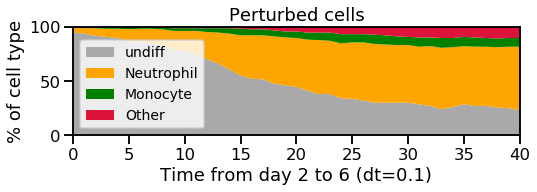

In [230]:
plt.figure(figsize=(8,2))
sns.set_context("talk")
labels=["undiff", "Neutrophil", "Monocyte", "Other"]
colors=["darkgrey", "orange", "green", "crimson"]
plt.stackplot(np.arange(40+1),  prop_table["undiff"], 
              prop_table["Neutrophil"],  prop_table["Monocyte"], 
              prop_table["Unnamed 0"], labels=labels, colors=colors)
plt.legend(loc='lower left', prop={'size': 14})
plt.margins(0,0)
plt.title('Perturbed cells')
plt.xlabel("Time from day 2 to 6 (dt=0.1)")
plt.ylabel("% of cell type")
plt.show()

# All cell types

In [162]:
std = torch.load("/data/gl/g2/sachit/data/klein/perturbations/std.pt")

In [163]:
std.keys()

dict_keys(['meta', 'xp_std', 'xu_std', 'pca_std', 'um_std', 'genes'])

In [164]:
um=std["um_std"]

In [165]:
ensemble = torch.load("/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_neu/control1_2_over.pt")

In [166]:
ensemble.keys()

dict_keys(['perturbed_genes', 'unperturbed_sim', 'unperturbed_tp', 'unperturbed_labs', 'perturbed_sim', 'perturbed_tp', 'perturbed_labs'])

In [167]:
xu_std = std["xu_std"]

In [168]:
unp=ensemble["unperturbed_tp"]

In [169]:
a=np.concatenate(unp[0][-1],axis=0)

In [170]:
temp=um.transform(a)

In [171]:
labs=pd.DataFrame({"celltype":ensemble["unperturbed_labs"][0][-1]})

In [172]:
labs["cellfactor"]=pd.factorize(labs.celltype)[0]

In [173]:
np.unique(labs["celltype"])

array(['Baso', 'Eos', 'Meg', 'Monocyte', 'Neutrophil', 'undiff'],
      dtype=object)

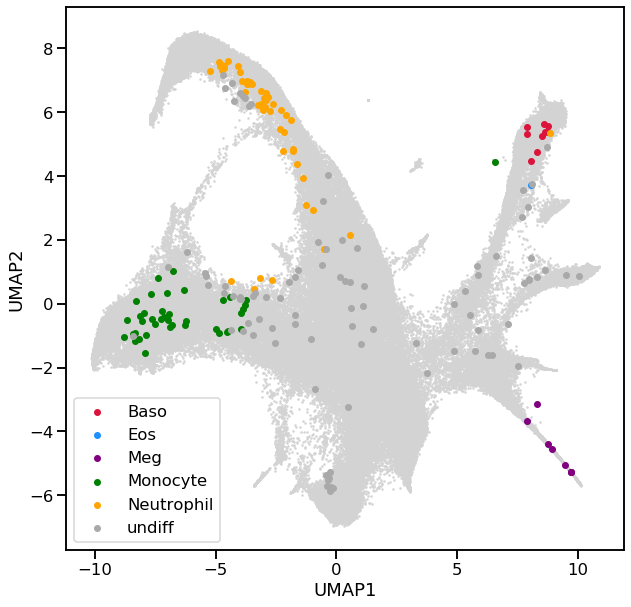

In [176]:
import matplotlib
sns.set_context("talk")
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(xu_std[:,0], xu_std[:,1], s=1, c="lightgray")
cmap=["crimson", "dodgerblue", "purple", "green", "orange", "darkgrey"]
#cmap=["green", "orange", "darkgrey"]
j=0
for lab in np.unique(labs["celltype"]):
    i=np.where(labs["celltype"]==lab)
#     if lab in ["Baso", "Eos", "Lymphoid", "Meg"]:
#         continue
    ax.scatter(temp[i,0], temp[i,1], s=30, color=cmap[j], label=lab)
    j+=1
#scatter=ax.scatter(temp[:,0], temp[:,1], s=50, cmap=matplotlib.colors.ListedColormap(cmap), c=labs["cellfactor"])
#sns.kdeplot(temp[:,0], temp[:,1])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
ax.legend()
#plt.axis("off")
plt.show()

In [177]:
yp=ensemble["unperturbed_labs"][0]

In [178]:
num_init=200

In [179]:
# make proportions table
prop_list=[]
for elt in yp:
    prop_dict = {"undiff":0.0, "Neutrophil":0.0, "Meg":0.0, "Monocyte": 0.0, "Baso": 0.0, "Mast": 0.0, "Lymphoid":0.0, "Erythroid":0.0, "Eos": 0.0, "Ccr7_DC": 0.0, "pDC": 0.0}
    for thing in elt:
        prop_dict[thing]=Counter(elt)[thing]/num_init
    prop_list.append(prop_dict)

In [180]:
prop_table=pd.DataFrame(prop_list)*100

Text(0, 0.5, '% of cell type')

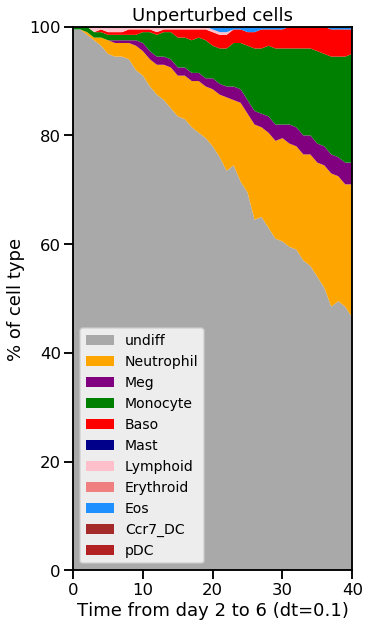

In [187]:
plt.figure(figsize=(5,10))
sns.set_context("talk")
labels=prop_table.columns
colors=["darkgrey", "orange", "purple", "green", "red", "darkblue", "pink","lightcoral","dodgerblue","brown","firebrick"]
plt.stackplot(np.arange(40+1),  prop_table.T, labels=labels, colors=colors)
plt.legend(loc='lower left', prop={'size': 14})
plt.margins(0,0)
plt.title('Unperturbed cells')
plt.xlabel("Time from day 2 to 6 (dt=0.1)")
plt.ylabel("% of cell type")

In [188]:
yp=ensemble["perturbed_labs"][0]

In [189]:
num_init=200

In [190]:
# make proportions table
prop_list=[]
for elt in yp:
    prop_dict = {"undiff":0.0, "Neutrophil":0.0, "Meg":0.0, "Monocyte": 0.0, "Baso": 0.0, "Mast": 0.0, "Lymphoid":0.0, "Erythroid":0.0, "Eos": 0.0, "Ccr7_DC": 0.0, "pDC": 0.0}
    for thing in elt:
        prop_dict[thing]=Counter(elt)[thing]/num_init
    prop_list.append(prop_dict)

In [191]:
prop_table=pd.DataFrame(prop_list)*100

Text(0, 0.5, '% of cell type')

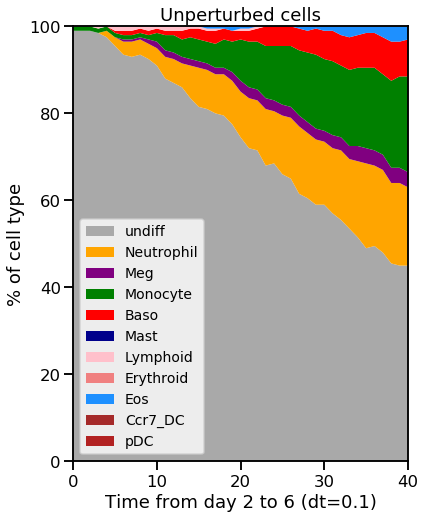

In [194]:
plt.figure(figsize=(6,8))
sns.set_context("talk")
labels=prop_table.columns
colors=["darkgrey", "orange", "purple", "green", "red", "darkblue", "pink","lightcoral","dodgerblue","brown","firebrick"]
plt.stackplot(np.arange(40+1),  prop_table.T, labels=labels, colors=colors)
plt.legend(loc='lower left', prop={'size': 14})
plt.margins(0,0)
plt.title('Unperturbed cells')
plt.xlabel("Time from day 2 to 6 (dt=0.1)")
plt.ylabel("% of cell type")